# Sample plotting code

In [26]:
import sys
sys.path.append('../')
from analysis_pipeline import *

In [27]:
a=load_analysis('/Users/nathanielnyema/Downloads/ip_cap_veh_7.npy')

recomputing...
successful


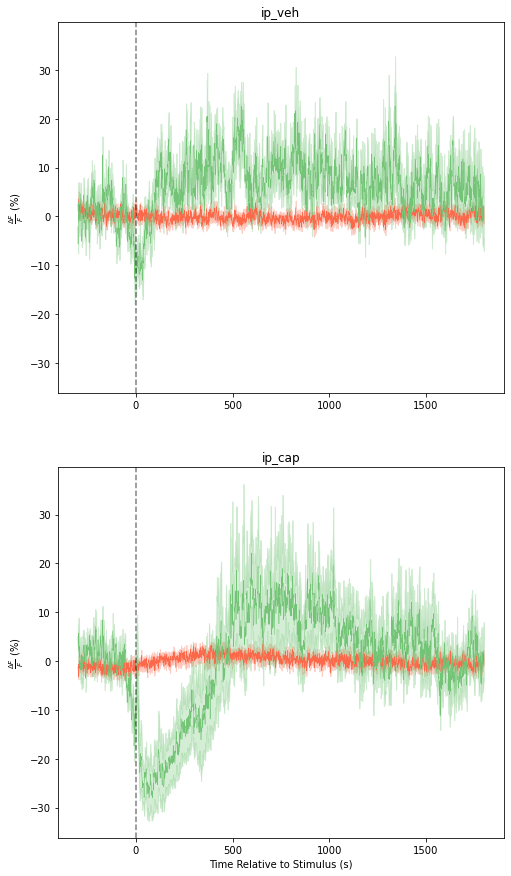

In [28]:
#by default we make a horizontal subplot but if you want
#to configure the subplot differently you can do so like this

_,ax=py.subplots(2,1,figsize=(8,15))
tmp=a.plot_both(ax=ax,show=False)
py.show()

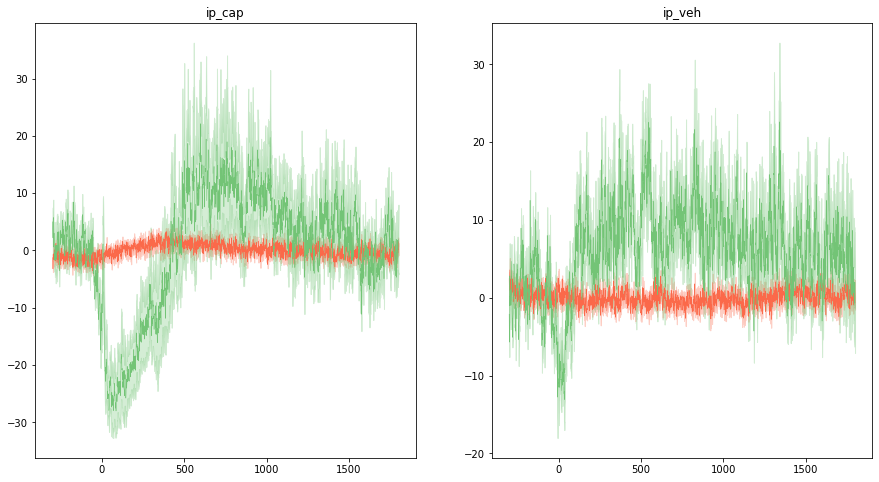

In [29]:
#if you want more control over which conditions appear on which axes you can try the following
_,ax=py.subplots(1,2,figsize=(15,8))

conds={'ip_cap':ax[0],
       'ip_veh':ax[1]}

for i in conds:
    a.plot_both(cond=i,ax=conds[i],show=False)
    conds[i].set_title(i)

py.show()

../analysis_pipeline.py:663: RuntimeWarning: invalid value encountered in double_scalars
  return np.trapz(y,x=y.index)/(y.index[-1]-y.index[0])
../analysis_pipeline.py:663: RuntimeWarning: invalid value encountered in double_scalars
  return np.trapz(y,x=y.index)/(y.index[-1]-y.index[0])


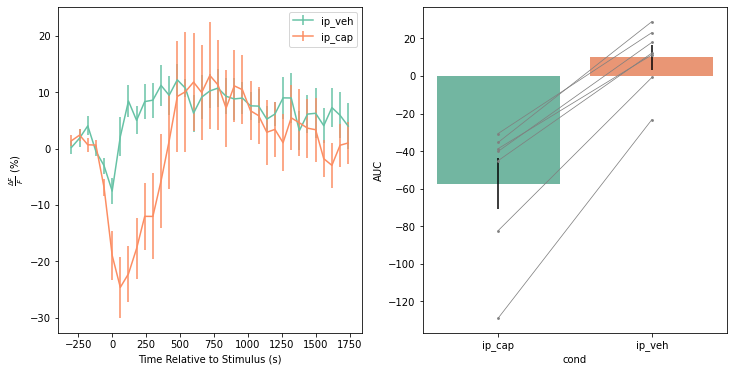

In [4]:
#Let's try doing a side by side of the binned data and the aucs for each condition
#first we create the subplot
_,ax=py.subplots(1,2,figsize=(12,6))

#plot binned data in 1 min bins
a.bin_plot(60,show=False,ax=ax[0])

#get the auc in the first 5 mins post stimulus
df=a.bin_auc(0,300,pr=False).sort_index()

#bar plot comparing auc between conditions
sns.barplot(data=df.reset_index(),y='AUC',x='cond',
            palette='Set2',ci=None,ax=ax[1])

#plot individual lines for each mouse
sns.lineplot(data=df.reset_index(),y='AUC',x='cond',
             hue='mouse',palette=sns.color_palette(['grey'],a.n_tot),
             marker='o',mec='grey',ms=2,size=1,legend=False,ax=ax[1])

# Note seaborn only plots confidence intervals for error so we calculate standard error and plot it separately here
ax[1].errorbar(x=[0,1],y=df.groupby('cond').mean()['AUC'],
               yerr=df.groupby('cond').sem()['AUC'],ls='',color='black')
py.show()